In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import rasterio
import georaster
import rioxarray

In [148]:
# X, Y Coordinates limit
X_LIM = [580000, 615100]
Y_LIM = [489000, 535000]

img = rioxarray.open_rasterio('InSAR_VerticalVelocities/S1BB_20170415T104205_20200411T104224_VVP1092_INT80_G_weF_4B62_vert_disp.tif')
df_img = img.to_dataframe(name = 'A')
df_img = df_img.reset_index()
df_img = df_img[(df_img.x > X_LIM[0])&(df_img.x < X_LIM[1])&(df_img.y > Y_LIM[0])&(df_img.y < Y_LIM[1])]
df_img = df_img.sort_values(['y','x'])

img1 = rioxarray.open_rasterio('InSAR_VerticalVelocities/S1BB_20161103T231251_20201106T231323_VVP1464_INT80_G_weF_7C0A_vert_disp.tif')
df_img1 = img1.to_dataframe(name = 'A')
df_img1 = df_img1.reset_index()
df_img1 = df_img1[(df_img1.x > X_LIM[0])&(df_img1.x < X_LIM[1])&(df_img1.y > Y_LIM[0])&(df_img1.y < Y_LIM[1])]
df_img1 = df_img1.sort_values(['y','x'])

img2 = rioxarray.open_rasterio('InSAR_VerticalVelocities/S1BB_20170521T104207_20210524T104232_VVP1464_INT80_G_weF_D400_vert_disp.tif')
df_img2 = img2.to_dataframe(name = 'A')
df_img2 = df_img2.reset_index()
df_img2 = df_img2[(df_img2.x > X_LIM[0])&(df_img2.x < X_LIM[1])&(df_img2.y > Y_LIM[0])&(df_img2.y < Y_LIM[1])]
df_img2 = df_img2.sort_values(['y','x'])

img3 = rioxarray.open_rasterio('InSAR_VerticalVelocities/S1BB_20170708T104210_20190710T104223_VVP732_INT80_G_weF_602B_vert_disp.tif')
df_img3 = img3.to_dataframe(name = 'A')
df_img3 = df_img3.reset_index()
df_img3 = df_img3[(df_img3.x > X_LIM[0])&(df_img3.x < X_LIM[1])&(df_img3.y > Y_LIM[0])&(df_img3.y < Y_LIM[1])]
df_img3 = df_img3.sort_values(['y','x'])

img4 = rioxarray.open_rasterio('InSAR_VerticalVelocities/S1BB_20191213T104226_20211214T104238_VVP732_INT80_G_weF_0E15_vert_disp.tif')
df_img4 = img4.to_dataframe(name = 'A')
df_img4 = df_img4.reset_index()
df_img4 = df_img4[(df_img4.x > X_LIM[0])&(df_img4.x < X_LIM[1])&(df_img4.y > Y_LIM[0])&(df_img4.y < Y_LIM[1])]
df_img4 = df_img4.sort_values(['y','x'])

In [149]:
# This might take a while
export = np.ones((5,len(df_img.y.unique()),len(df_img.x.unique())))

Y = 0
X = 0

for i in df_img.y.unique():
    X = 0
    for j in df_img.x.unique():
        if (Y < len(df_img.y.unique()))&(X<len(df_img.x.unique())):
            if np.float(df_img[(i==df_img.y) & (j==df_img.x)]['A']) == 0:
                export[0,Y,X] = np.nan
            else:
                export[0,Y,X] = np.float(df_img[(i==df_img.y) & (j==df_img.x)]['A'])*100/3
        X+=1
    Y += 1
    
Y = 0
X = 0
    
for i in df_img1.y.unique():
    X = 0
    for j in df_img1.x.unique():
        if (Y < len(df_img.y.unique()))&(X<len(df_img.x.unique())):
            if np.float(df_img1[(i==df_img1.y) & (j==df_img1.x)]['A']) == 0:
                export[1,Y,X] = np.nan
            else:
                export[1,Y,X] = np.float(df_img1[(i==df_img1.y) & (j==df_img1.x)]['A'])*100/4
        X+=1
    Y += 1
    
Y = 0
X = 0
    
for i in df_img2.y.unique():
    X = 0
    for j in df_img2.x.unique():
        if (Y < len(df_img.y.unique()))&(X<len(df_img.x.unique())):
            if np.float(df_img2[(i==df_img2.y) & (j==df_img2.x)]['A']) == 0:
                export[2,Y,X] = np.nan
            else:
                export[2,Y,X] = np.float(df_img2[(i==df_img2.y) & (j==df_img2.x)]['A'])*100/4
        X+=1
    Y += 1
    
Y = 0
X = 0
    
for i in df_img3.y.unique():
    X = 0
    for j in df_img3.x.unique():
        if (Y < len(df_img.y.unique()))&(X<len(df_img.x.unique())):
            if np.float(df_img3[(i==df_img3.y) & (j==df_img3.x)]['A']) == 0:
                export[3,Y,X] = np.nan
            else:
                export[3,Y,X] = np.float(df_img3[(i==df_img3.y) & (j==df_img3.x)]['A'])*100/2
        X+=1
    Y += 1
    
Y = 0
X = 0
    
for i in df_img4.y.unique():
    X = 0
    for j in df_img4.x.unique():
        if (Y < len(df_img.y.unique()))&(X<len(df_img.x.unique())):
            if np.float(df_img4[(i==df_img4.y) & (j==df_img4.x)]['A']) == 0:
                export[4,Y,X] = np.nan
            else:
                export[4,Y,X] = np.float(df_img4[(i==df_img4.y) & (j==df_img4.x)]['A'])*100/2
        X+=1
    Y += 1
    
export

C:\Users\mdomi\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mdomi\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
C:\Users\mdomi\anaconda3\lib\site-packages

array([[[ 0.37485252,  0.55908797,  0.4354982 , ...,         nan,
         -0.14060784,  0.18501799],
        [-0.4227384 ,  0.49160949,         nan, ...,  0.42867906,
                 nan, -0.57879984],
        [ 0.06039835,         nan,  0.15813049, ...,  0.22500597,
          0.15587459, -0.54576012],
        ...,
        [-0.03491021,  0.44379163,  0.53408779, ...,  1.55388688,
          1.27584897,         nan],
        [        nan,  0.39778333,  0.54340468, ...,  1.38184652,
                 nan,         nan],
        [        nan,  0.00917388,  0.45804465, ...,  1.00273124,
          1.43004569,         nan]],

       [[-0.06525521, -0.08734234,  0.06581015, ...,         nan,
          0.14670567,  0.01842872],
        [-0.04419537,  0.63713952,  0.65040141, ..., -0.50219549,
         -0.11053688,  0.21974195],
        [ 0.56270831,  0.8315024 ,  0.29218725, ...,  0.27133897,
          0.31543486,  0.30681968],
        ...,
        [ 0.11831436,  0.23950143,  0.26346724, ...,  

In [150]:
CI_95 = [[],[]]
CI_95[0] = np.mean(export, axis=0) + 1.96*np.std(export, axis= 0)/np.sqrt(5)
CI_95[1] = np.mean(export, axis=0) - 1.96*np.std(export, axis= 0)/np.sqrt(5)
CI_95 = np.array(CI_95)
STD = np.array([np.std(export, axis= 0)])/np.sqrt(5)
STD.shape
mean = np.array([np.mean(export, axis = 0)])

In [151]:
ras_meta = {'driver': 'GTiff', 
            'dtype': 'float64', 
            'nodata': 0, 
            'width': export.shape[2], 
            'height': export.shape[1], 
            'count': 1, 
            'crs': rasterio.crs.CRS.from_epsg(32618), 
            'transform': rasterio.transform.Affine(80.0, 0.0, X_LIM[0], 0.0, 80.0, Y_LIM[0]), 
            'tiled': False, 
            'interleave': 'band'}

with rasterio.open('Processed_InSAR/InSARS_Bogotá_Subsidence_MEAN.tif', 'w', **ras_meta) as dst:
    dst.write(np.array(mean))

In [158]:
ras_meta = {'driver': 'GTiff', 
            'dtype': 'float64', 
            'nodata': 0, 
            'width': export.shape[2], 
            'height': export.shape[1], 
            'count': 1, 
            'crs': rasterio.crs.CRS.from_epsg(32618), 
            'transform': rasterio.transform.Affine(80.0, 0.0, X_LIM[0], 0.0, 80.0, Y_LIM[0]), 
            'tiled': False, 
            'interleave': 'band'}

with rasterio.open('Processed_InSAR/InSARS_Bogotá_Subsidence_STD_ERROR.tif', 'w', **ras_meta) as dst:
    dst.write(np.array(STD))

In [159]:
ras_meta = {'driver': 'GTiff', 
            'dtype': 'float64', 
            'nodata': 0, 
            'width': export.shape[2], 
            'height': export.shape[1], 
            'count': 2, 
            'crs': rasterio.crs.CRS.from_epsg(32618), 
            'transform': rasterio.transform.Affine(80.0, 0.0, X_LIM[0], 0.0, 80.0, Y_LIM[0]), 
            'tiled': False, 
            'interleave': 'band'}

with rasterio.open('Processed_InSAR/InSARS_Bogotá_Subsidence_CI95.tif', 'w', **ras_meta) as dst:
    dst.write(np.array(CI_95))

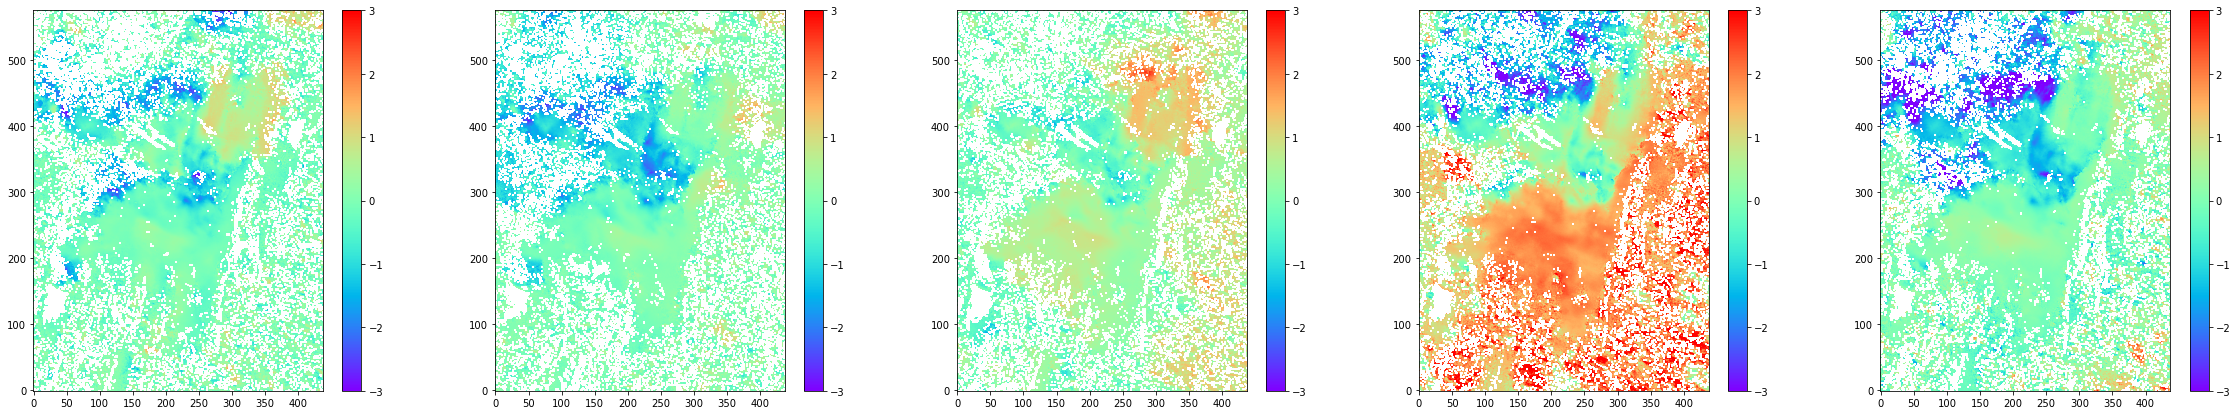

In [154]:
n = 5
fig = plt.figure(figsize = (40,7))

for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(export[i], cmap = 'rainbow', vmin = -3, vmax = 3)
    plt.gca().invert_yaxis()
    plt.colorbar()

In [155]:
img = rioxarray.open_rasterio('Processed_InSAR/InSARS_Bogotá_Subsidence_MEAN.tif')
df_img = img.to_dataframe(name = 'A')
df_img = df_img.reset_index()
df_img = df_img[(df_img.x > X_LIM[0])&(df_img.x < X_LIM[1])&(df_img.y > Y_LIM[0])&(df_img.y < Y_LIM[1])]
df_img = df_img.sort_values(['y','x'])

In [156]:
# Calibration with BOGT (MORA-PAEZ et al, 2020)
calibration = 3.45 + df_img[(df_img.x > 601840)&(df_img.x < 602080)&(df_img.y<513080)&(df_img.y>512840)].mean()['A']
mean_calibrated = np.array([np.mean(export, axis = 0)]) - calibration

In [157]:
ras_meta = {'driver': 'GTiff', 
            'dtype': 'float64', 
            'nodata': 0, 
            'width': export.shape[2], 
            'height': export.shape[1], 
            'count': 1, 
            'crs': rasterio.crs.CRS.from_epsg(32618), 
            'transform': rasterio.transform.Affine(80.0, 0.0, X_LIM[0], 0.0, 80.0, Y_LIM[0]), 
            'tiled': False, 
            'interleave': 'band'}

with rasterio.open('Processed_InSAR/InSARS_Bogotá_Subsidence_MEAN_BOGT_calib.tif', 'w', **ras_meta) as dst:
    dst.write(np.array(mean_calibrated))